## Hello everyone. I am Shreenidhi Hipparagi, Data Science and Business Analytics Intern, The Spark Foundations
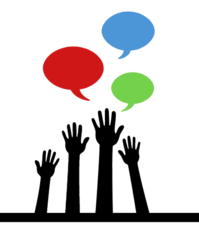

# The Task 2

# Create the decision tree algorithm and visualize it graphically .

# The dataset used to create a decision tree is Iris dataset.  We have to classify the output  based on input attributes. 

# Input attributes are : 1) SepalLengthCm 2) SepalWidthCm 3)PetalLengthCm 4)PetalWidthCm

# Target variable :- Species 
## The species are classified into three types 
1) Iris-setosa
2) Iris-versicolor
3) Iris-virginica

## The task is to feed new data to our model and it should classify the right class correctly

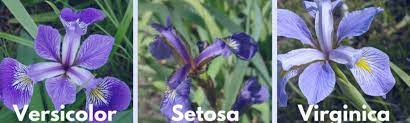

# Lets import the libraries required for the task

In [1]:
import pandas as pd # data manipulation
import numpy as np # numerical computation
import seaborn as sns #visualization
import matplotlib.pyplot as plt

F:\python\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
F:\python\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
F:\python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data=pd.read_csv("Iris.csv") #imported the dataset
print("Dataset is imported")


Dataset is imported


# Lets check if the dataset is correctly imported or not, by looking at few rows 

In [3]:
data.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Let us drop id from data 

In [4]:
data=data.drop("Id",axis=1)
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Lets check if there are any null values in the dataset

In [5]:
count_null=data.isnull().sum()
print("Total null values are:{}".format(count_null))

Total null values are:SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# Good news, we have no null values in our dataset

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Lets visualize

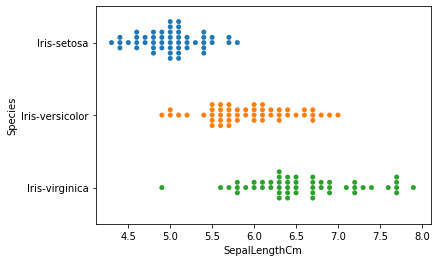

In [7]:
sns.swarmplot(x=data['SepalLengthCm'],y=data['Species'],data=data)

# Observing the graph, we can find some interesting information about the dataset

# Iris-setosa's sepal length is ranging between 4.3 to nearly 5.7 cm
## What does this mean? 
Looking at the sepal length in cm we can say that if the sepal length is small then the species may be Iris-setosa

If the sepal length is more, the species may be Iris-virginica

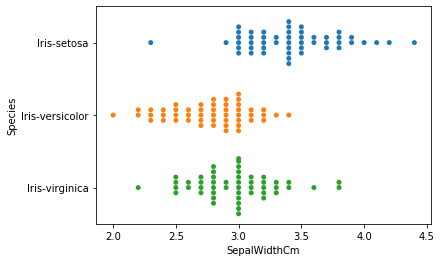

In [8]:
sns.swarmplot(x=data['SepalWidthCm'],y=data['Species'],data=data)

# Observing above graph, Iris-setosa has high sepal width 

## Small sepal length and high sepal width character can be said to be of Iris-setosa

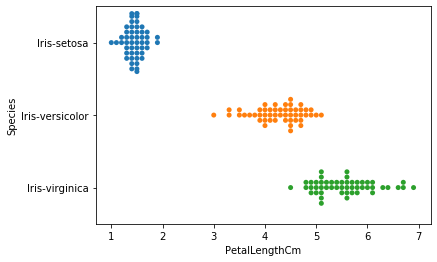

In [9]:
sns.swarmplot(x=data['PetalLengthCm'],y=data['Species'],data=data)

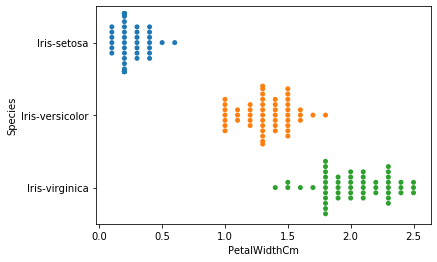

In [10]:
sns.swarmplot(x=data['PetalWidthCm'],y=data['Species'],data=data)

# Observing the above two graphs, Iris-setosa has small petal length and small petal width

In [11]:
count_class_num=data['Species'].value_counts()
print("The class distribution is: {}".format(count_class_num))

The class distribution is: Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


# We have 150 datapoints and all the classes are equally distributed 

In [12]:
x=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] #input attributes
y=data['Species'] #target
print("Successfully created input and target variable")

Successfully created input and target variable


In [13]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y=le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# The model cannot recoginize species as they are in text so we have used label encoder to encode text into number .
## Here 0 refers to Iris-setosa, 1 refers to Iris-versicolor and 2 to Iris-virginica

# Lets split the data into train and test set

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)

# we have created 25% test set and 75% trainset as baseline model 

# Lets Build the model

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',random_state=7)
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

## Model is trained. Lets evaluate our model by testing our model with xtest

In [17]:
ypred=dtc.predict(xtest)
print("Prediction on test set completed")

Prediction on test set completed


In [18]:
from sklearn.metrics import confusion_matrix as cm
cm(ypred,ytest)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 12]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report as cr
cr(ypred,ytest)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       0.86      0.92      0.89        13\n           2       0.92      0.86      0.89        14\n\n    accuracy                           0.92        38\n   macro avg       0.93      0.93      0.93        38\nweighted avg       0.92      0.92      0.92        38\n'

In [20]:
from sklearn.metrics import f1_score
f1=f1_score(ytest,ypred,average='weighted')
print("The f1-score is : {}".format(f1))

The f1-score is : 0.9210526315789473


## F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

### What is the good f1-score ?
An F1 score reaches its best value at 1 and worst value at 0.

# First subtask of this task is now completed. We have built a model that can be used to classify different Species 

# Second subtask was to visualize the model or visualize the decision tree algorithm that we have created 

#  Lets download the libraries required for visualization of decision tree algorithm

In [21]:
!pip install pydotplus
!pip install graphviz

In [22]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


F:\python\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


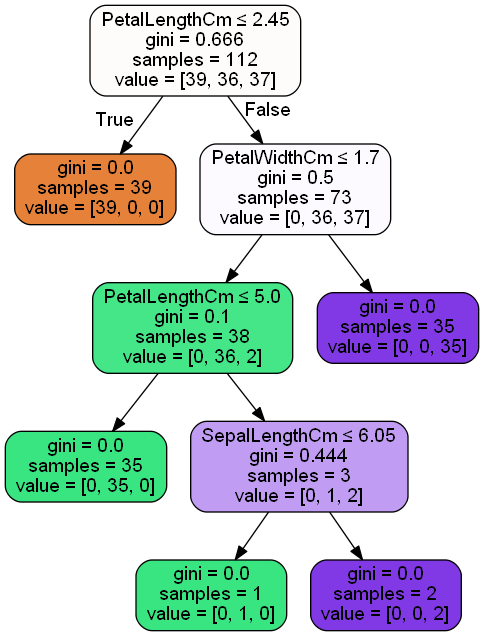

In [23]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,feature_names=x.columns,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())